# Do you work for this exercise in either a jupyter notebook named evaluate within the regression directory. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within the regression directory.

In [95]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

import evaluate
import pydataset

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1.) Load the tips dataset from either pydataset or seaborn.

In [2]:
df = sns.load_dataset('tips')
x = df['total_bill']
y = df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2.) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

- Here is some sample code to get you started:

In [3]:
from statsmodels.formula.api import ols

model = ols('tip ~ total_bill', data=df).fit()
predictions = model.predict(df.total_bill)

> The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [4]:
df['yhat_baseline'] = df['tip'].mean()
df['yhat'] = predictions
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


### 3.) Plot the residuals for the linear regression model that you made.

In [5]:
df['residuals'] = df['yhat'] - df['tip']
df['residual_baseline'] = df['yhat_baseline'] - df['tip']

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


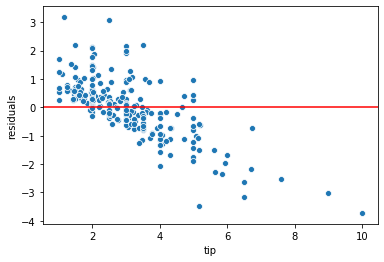

In [7]:
#residuals
sns.scatterplot(x='tip', y='residuals', data=df)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

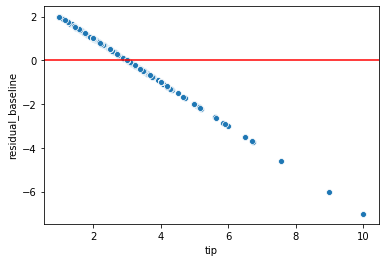

In [8]:
#baseline residuals
sns.scatterplot(x='tip', y='residual_baseline', data=df)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### 4.) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [9]:
df['residual^2'] = df.residuals ** 2
df['residual_baseline^2'] = df.residual_baseline ** 2
SSE = sum(df['residual^2'])
SSE

252.78874385077603

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,residual_baseline,residual^2,residual_baseline^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721,0.011487,0.374203


In [11]:
MSE = SSE/len(df)

RMSE = sqrt(MSE)


In [12]:
ESS = sum((df.yhat - df.tip.mean())**2)
TSS = ESS + SSE
print(f"ESS: ", ESS, "TSS: ", TSS, "SSE: ", SSE, "RMSE: ", RMSE, "MSE: ", MSE)

ESS:  212.42373319840414 TSS:  465.21247704918017 SSE:  252.78874385077603 RMSE:  1.0178504025697377 MSE:  1.036019442011377


### 5.) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [13]:
SSE_baseline = sum(df['residual_baseline^2'])
MSE_baseline = SSE_baseline/len(df)
RMSE_baseline = sqrt(MSE_baseline)

print(f"SSE_baseline: ", SSE_baseline, "RMSE_baseline: ", RMSE_baseline)

SSE_baseline:  465.21247704918085 RMSE_baseline:  1.3807999538298958


In [14]:
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(df.tip, df.yhat)*len(df)
SSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)*len(df)

MSE2 = mean_squared_error(df.tip, df.yhat)

MSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)

RMSE2 = sqrt(mean_squared_error(df.tip, df.yhat))
RMSE2_baseline = sqrt(mean_squared_error(df.tip, df.yhat_baseline))



In [15]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

In [16]:
df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
print(df_eval)
print(df_baseline_eval)


  metric  model_error
0    SSE   252.788744
1    MSE     1.036019
2   RMSE     1.017850
          metric  model_error
0   SSE_baseline   465.212477
1   MSE_baseline     1.906609
2  RMSE_baseline     1.380800


### 6.) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [17]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error

df_eval

,metric,model_error,error_delta
0,SSE,252.788744,-212.423733
1,MSE,1.036019,-0.870589
2,RMSE,1.017850,-0.362950


In [18]:
# add the ESS, SSE, TSS from the model to a dataframe
ss = pd.DataFrame(np.array(['SSE','ESS','TSS']), columns=['metric'])
ss['model_values'] = np.array([SSE, ESS, TSS])

# compute and add the baseline values to the dataframe
ESS_baseline = sum((df.yhat_baseline - df.tip.mean())**2)
SSE_baseline = df_baseline_eval[df_baseline_eval.metric=='SSE_baseline']['model_error'][0]
TSS_baseline = ESS_baseline + SSE_baseline
ss

,metric,model_values
0,SSE,252.788744
1,ESS,212.423733
2,TSS,465.212477


In [19]:
ss['model_values'] = np.array([SSE_baseline, ESS_baseline, TSS_baseline])

ss


,metric,model_values
0,SSE,465.212477
1,ESS,0.000000
2,TSS,465.212477


### 7.) What is the amount of variance explained in your model?

In [20]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.457
Percent of variance in y explained by x =  45.7 %


In [21]:
evs = explained_variance_score(df.tip, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


### 8.) Is your model significantly better than the baseline model?

In [41]:
f_pval = model.f_pvalue

print("p-value for model significance = ", f_pval)

p-value for model significance =  6.692470646863376e-34


### 9.) Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot

In [79]:
def plot_residuals(df, y, y_hat):
    '''
    user inputs a dataframe, then Data or column name in data for the predictor variable.
    then Data or column name in data for the response variable. And 
    function will produce a scatter plot
    with a baseline
    '''
    sns.residplot(x=y, y=y_hat, data=df)


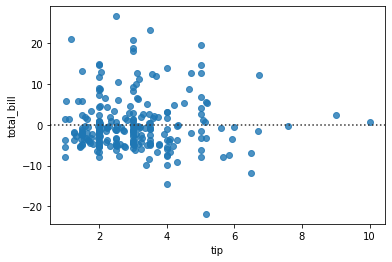

In [80]:
plot_residuals(df, "tip", "total_bill")

- regression_errors(y, yhat): returns the following values:

 - sum of squared errors (SSE)

 - explained sum of squares (ESS)

 - total sum of squares (TSS)

 - mean squared error (MSE)

 - root mean squared error (RMSE)

In [67]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,residual_baseline,residual^2,residual_baseline^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721,0.011487,0.374203


In [70]:
def regression_errors(y, yhat, df):
    '''
    input df.y value and df.yhat value to produce a 
    dataframe of regression errors and their values
    '''
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    import numpy as np
    import pandas as pd
    SSE = mean_squared_error(y, yhat)*len(df)
    ESS = sum((y - yhat.mean())**2)
    TSS = ESS + SSE
    MSE = mean_squared_error(y, yhat)
    RMSE = sqrt(mean_squared_error(y, yhat))
    ss = pd.DataFrame(np.array(['SSE','ESS','TSS', 'MSE', 'RMSE']), columns=['metric'])
    ss['model_values'] = np.array([SSE, ESS, TSS, MSE, RMSE])
    return ss
    

In [71]:
regression_errors(df.tip, df.yhat, df)

,metric,model_values
0,SSE,252.788744
1,ESS,465.212477
2,TSS,718.001221
3,MSE,1.036019
4,RMSE,1.017850


- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [72]:
def baseline_mean_errors(y, yhat_baseline, df):
    '''
    input df.y value and df.baseline_yhat value to 
    produce a dataframe of baseline regression errors 
    and their values
    '''
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    import numpy as np
    import pandas as pd
    SSE_baseline = mean_squared_error(y, yhat_baseline)*len(df)
    MSE_baseline = mean_squared_error(y, yhat_baseline)
    RMSE_baseline = RMSE2_baseline = sqrt(mean_squared_error(y, yhat_baseline))
    baseline = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
    baseline['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
    return baseline

In [73]:
baseline_mean_errors(df.tip, df.yhat_baseline, df)

,metric,model_error
0,SSE_baseline,465.212477
1,MSE_baseline,1.906609
2,RMSE_baseline,1.380800


- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [74]:
def better_than_baseline(y, yhat, yhat_baseline, df):
    '''
    input df.y, df.yaht, df.yhat_baseline, df
    calculates SSE_baseline and SSE for the model
    then id the model's SSE is smaller than the baseline
    returns true
    '''
    SSE_baseline = mean_squared_error(y, yhat_baseline)*len(df)
    SSE_model = mean_squared_error(y, yhat)*len(df)
    return SSE_model < SSE_baseline

- model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [88]:
def model_significance(ols_model):
    '''
    takes an ols model as input and returns the r^2
    and the p-value
    '''
    r2 = ols_model.rsquared
    p_value = ols_model.f_pvalue
    df_model_sig = pd.DataFrame(np.array(['r^2', 'f p-value']), columns=['metric'])
    df_model_sig['value'] = np.array([r2, p_value])
    return df_model_sig
    

In [90]:
model_significance(model)

,metric,value
0,r^2,4.566166e-01
1,f p-value,6.692471e-34


### 10.) Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [98]:
mpg = pydataset.data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [110]:
model = ols('hwy ~ displ', data=mpg).fit()
predictions = model.predict()

In [111]:
evaluate.regression_errors(mpg.hwy, predictions, df)

,metric,model_values
0,SSE,3559.719138
1,ESS,8261.662393
2,TSS,11821.381531
3,MSE,14.589013
4,RMSE,3.819557


In [106]:
mpg['baseline_yhat'] = mpg.hwy.mean()
evaluate.baseline_mean_errors(mpg.hwy, mpg.baseline_yhat, df)

,metric,model_error
0,SSE_baseline,8614.724889
1,MSE_baseline,35.306250
2,RMSE_baseline,5.941906


In [108]:
mpg['yhat'] = predictions
evaluate.better_than_baseline(mpg.hwy, mpg.yhat, mpg.baseline_yhat, mpg)

True

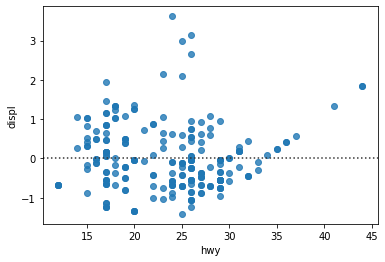

In [109]:
evaluate.plot_residuals(mpg, mpg.hwy, mpg.displ)